In [2]:
import pandas as pd 
import numpy as np

In [16]:
### titanic dataset
df = pd.read_csv('titanicfinal.csv')

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### these are missing completely at random (MCAR) -> there is no relation between the missing values and the rest of the data 

In [20]:
df[df['Embarked'].isnull()]
# in this case, embarked is an MCAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing data not at random 
- the null values have some pattern and relation to the rest of the data.

In [21]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [22]:
df['cabin_null'].mean() #77 percent of missing value 

0.7710437710437711

In [15]:
 ### checking what number of people that have survived have null values for cabin and how many have not 

In [30]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

##### different types of handling missing values 
- mean, median and mode replacement
- Random Sample Imputation
- Capturing NaN values with a new feature (*)
- End of distribution imputation
- Arbitrary Imputation
- Feature categories imputation

### 1) mean, median and mode imputation
##### when to apply this?
- M3 imputation has the assumption that data is missing completely at random [MCAR]
- we can think of replacing NaN with most frequently occouring variable 

In [31]:
df = pd.read_csv('titanicfinal.csv',usecols=['Age','Fare','Survived'])

In [32]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [33]:
### seeing percentage of missing values 
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
def impute_nan(df,variable,median):
    var = variable+'mean'
    df[var] = df[variable].fillna(median)

In [42]:
impute_nan(df,'Age',df.Age.median())

In [47]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [44]:
df[df['Age'].isnull()]

,Survived,Age,Fare,Agemean
5,0,NaN,8.4583,28.0
17,1,NaN,13.0000,28.0
19,1,NaN,7.2250,28.0
26,0,NaN,7.2250,28.0
28,1,NaN,7.8792,28.0
...,...,...,...,...
859,0,NaN,7.2292,28.0
863,0,NaN,69.5500,28.0
868,0,NaN,9.5000,28.0
878,0,NaN,7.8958,28.0


In [48]:
df['Age'].std()

14.526497332334044

In [49]:
df['Agemean'].std()

13.019696550973194

##### look at the standard deviation of Age with and without null values. the standard deviation reduced when we filled the null values, meaning the data now became more clustered around the mean 

In [50]:
import matplotlib.pyplot as plt 
%matplotlib inline 


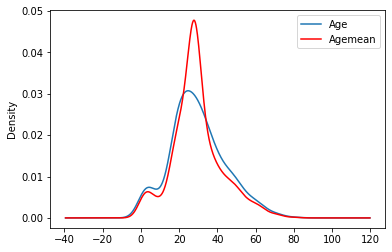

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Agemean'].plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
#### notice the read line, and see that it is more clustered around 
# the mean than blue line 

## advantages and disadvantages of M3 imputation
#### advantages:
- easy to implement 
- faster way to obtain the complete dataset
#### disadvantages:
- change/disortion in the original varience of the data
- impacts correlation
